two_levels_isotropic_dielectric

In [1]:
from IPython.display import display, Math, Latex

k = var ('k')

a = var('a')
assume(a>0)

x = var('x')
y = var('y')
z = var('z')

c = var('c')
assume(c>0)
omega = var('omega')

rot E = mu * i * omega / c * H

rot H = - i * omega / c * epsilon_ab * E

Laplasian E + mu * epsilon_ab * omega^2 / c^2 * E - grad div E = 0

уравнение Даламбера

mu * epsilon_ab / c^2 * diff(E, t, 2) - Laplasian E = 0

Ищем решение в виде

E = E(x) * exp(I * k * z) * exp(-I * omega * t)

подставляя в уравнение Даламбера приходим к обыкновенному дифференциальному уравнению

diff (E(x), x, 2) + (mu * epsilon * omega^2 / c^2 - k^2) * E(x) = 0

для диэлектрика

kappa^2 = (mu * epsilon * omega^2 / c^2 - k^2)

diff (E(x), x, 2) + kappa^2 * E(x) = 0

In [2]:
n_layers = 2

kappa = []
for i in range(n_layers):
    exec ("kappa_" + str(i) + " = var ('kappa_" + str(i) + "') ")
    exec ("assume(kappa_" + str(i) + " > 0)")
    exec ("kappa += [kappa_" + str(i) + "]")

display(Math(latex(kappa)))

<IPython.core.display.Math object>

In [3]:
epsilon = []
for i in range(n_layers):
    exec ("epsilon_" + str(i) + " = var ('epsilon_" + str(i) + "') ")
    exec ("assume(epsilon_" + str(i) + " > 0)")
    exec ("epsilon += [epsilon_" + str(i) + "]")

display(Math(latex(epsilon)))

<IPython.core.display.Math object>

In [4]:
mu = []
for i in range(n_layers):
    exec ("mu_" + str(i) + " = var ('mu_" + str(i) + "') ")
    exec ("assume(mu_" + str(i) + " > 0)")
    exec ("mu += [mu_" + str(i) + "]")

display(Math(latex(mu)))

<IPython.core.display.Math object>

In [5]:
# исходя из вида дифференциальных уравнений для диэлектрика
# записываем соотнощения для волнового вектора в виде уравнений
eq_kappa = []
for i in range(n_layers):
    eq_kappa += [mu[i] * epsilon[i] * omega^2 / c^2 - k^2 == kappa[i]^2]

display(Math(latex(eq_kappa)))

<IPython.core.display.Math object>

In [6]:
# решаем полученные обыкновенные дифференциальные уравнения
E_x = function('E_x')(x)

de_dielectric_x = diff (E_x, x, 2) + kappa[i]^2 * E_x == 0
E_dielectric_x = desolve(de_dielectric_x, E_x, ivar = x)


# получая таким образом выражения для электрического поля в диэлектрике
display(Math(latex(E_dielectric_x)))
# _K2*cos(kappa*x) + _K1*sin(kappa*x)

<IPython.core.display.Math object>

In [7]:
Ax = []
Az = []
Bx = []
Bz = []
for i in range(n_layers):
    exec ("Ax_" + str(i) + " = var ('Ax_" + str(i) + "') ")
    exec ("Az_" + str(i) + " = var ('Az_" + str(i) + "') ")
    exec ("Bx_" + str(i) + " = var ('Bx_" + str(i) + "') ")
    exec ("Bz_" + str(i) + " = var ('Bz_" + str(i) + "') ")
    exec ("Ax += [Ax_" + str(i) + "]")
    exec ("Bx += [Bx_" + str(i) + "]")
    exec ("Az += [Az_" + str(i) + "]")
    exec ("Bz += [Bz_" + str(i) + "]")

display(Math(latex(Ax)))
display(Math(latex(Az)))
display(Math(latex(Bx)))
display(Math(latex(Bz)))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [8]:
Ex = []
Ez = []
for i in range(n_layers):
    Ex += [ lambda x, i=i : Ax[i] * cos(kappa[i] * x) + Bx[i] * sin(kappa[i] * x)]
    Ez += [ lambda x, i=i : Az[i] * cos(kappa[i] * x) + Bz[i] * sin(kappa[i] * x)]

for i in range(n_layers):
    display(Math(latex(Ex[i](x))))
    display(Math(latex(Ez[i](x))))
    print("")

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [9]:
rot_E_y = []
rotE_y = []
Hy = []
for i in range(n_layers):
    rot_E_y += [lambda x, i=i : (I * k * Ex[i](x) - diff(Ez[i](x), x))]
    exec ("rotE_y += [lambda x, i=i :"+ str(rot_E_y[i](x)) + "]")
    Hy      += [lambda x, i=i : c / (mu[i] * I * omega) * rotE_y[i](x)]

    display(Math(latex(rot_E_y[i](x))))
    display(Math(latex(rotE_y[i](x))))
    print("")
    display(Math(latex(Hy[i](x))))
    print("")

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [10]:
rot_H_x = []
rot_H_z = []
for i in range(n_layers):
    rot_H_x += [lambda x, i=i : -I * k * Hy[i](x)]
    rot_H_z += [lambda x, i=i : diff(Hy[i](x), x)]

    display(Math(latex(rot_H_x[i](x))))
    display(Math(latex(rot_H_z[i](x))))
    print("")

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [11]:
# rot H = (1/c) * dD/dt
eq_rot_H_x = []
eq_rot_H_z = []
for i in range(n_layers):
    eq_rot_H_x += [rot_H_x[i](x) == (1/c) *(-I * omega) * epsilon[i] * Ex[i](x)]
    eq_rot_H_z += [rot_H_z[i](x) == (1/c) *(-I * omega) * epsilon[i] * Ez[i](x)]

    display(Math(latex(eq_rot_H_x[i])))
    print("")
    display(Math(latex(eq_rot_H_z[i])))
    print("")

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [12]:
exclude_vars = [Az[0], Az[n_layers - 1]]
exclude_vars

[Az_0, Az_1]

In [13]:
# граничные условия
# тангенциальная компонента электрического поля
eq_Ez_superconductor_boundary_conditions = []
eq_Ez_superconductor_boundary_conditions += [Ez[0](0) == 0.0]
eq_Ez_superconductor_boundary_conditions += [Ez[n_layers - 1](a*n_layers) == 0.0]

display(Math(latex(eq_Ez_superconductor_boundary_conditions)))

boundary_subs_begin = solve(eq_Ez_superconductor_boundary_conditions[0], Az[0])[0]
boundary_subs_end = solve(eq_Ez_superconductor_boundary_conditions[1], Az[n_layers - 1])[0]

display(Math(latex(boundary_subs_begin)))
display(Math(latex(boundary_subs_end)))

boundary_subs = [boundary_subs_begin, boundary_subs_end]
display(Math(latex(boundary_subs)))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [14]:
# граничные условия на гринице диэлектрика и диэлектрика
# тангенциальная компонента электрического поля
eq_Ez_boundary_conditions = []
for i in range(n_layers - 1):
    eq_Ez_boundary_conditions += [Ez[i] (a*(i+1)) == Ez[i+1](a*(i+1))]

    display(Math(latex(eq_Ez_boundary_conditions[i])))
    print("")

<IPython.core.display.Math object>

In [15]:
# граничные условия на гринице диэлектрика и диэлектрика
# нормальная компонента электрического смещения
eq_Ex_boundary_conditions = []
for i in range(n_layers - 1):
    eq_Ex_boundary_conditions += [epsilon[i] * Ex[i](a*(i+1)) == epsilon[i+1] * Ex[i+1](a*(i+1))]

    display(Math(latex(eq_Ex_boundary_conditions[i])))
    print("")

<IPython.core.display.Math object>

In [16]:
# граничные условия на гринице диэлектрика и диэлектрика
# тангенциальная компонента поля H
eq_Hy_boundary_conditions = []
for i in range(n_layers - 1):
    eq_Hy_boundary_conditions += [Hy[i] (a*(i+1)) == Hy[i+1](a*(i+1))]

    display(Math(latex(eq_Hy_boundary_conditions[i])))
    print("")

<IPython.core.display.Math object>

In [17]:
def GenerateMatrix(equsys, vars):
    A=matrix(SR, [[(equ.lhs() - equ.rhs()).coefficient(v) for v in vars] for equ in equsys])
    return A

def GenerateMatrixMult(equsys, vars):
    A=matrix(SR, [[(equ.lhs() - equ.rhs()).coefficient(v) * v for v in vars] for equ in equsys])
    return A

def reduceDependedRows(M):
    print ("")
    print ("M.nrows()", M.nrows())
    print ("M.ncols()", M.ncols())
    print ("M.rank()", M.rank())

    M_pivot_rows = M.pivot_rows()
    print ("M.pivot_rows() =", M_pivot_rows)

    M_rows = M.rows()
    for row in M_rows:
        print("row =")
        display(Math(latex(row)))

    reduced_list = []
    for r in M_pivot_rows:
        print ("M_rows[", r, "] =")
        display(Math(latex(M_rows[r])))
        reduced_list.append(M_rows[r])

    reduced_M = matrix(SR, len(M_pivot_rows), M.ncols(), reduced_list)
    if reduced_M.nrows() == reduced_M.ncols():
        reduced_M_det = reduced_M.det()
        print ("")
        print ("reduced_M.det() =")
        display(Math(latex(reduced_M_det)))
    return reduced_M

In [18]:
def rot_H_solve(M_rotH, vars, eq_kappa, kappa):
    if (M_rotH.nrows() != 2):
        return
    if (M_rotH.ncols() != len(vars)):
        return
    xx = vector(SR, vars)
    yy = vector(SR, [0, 0])
    print("eqns =")
    eqns = [(M_rotH*xx)[index] == yy[index] for index in [0,1]]
    display(Math(latex(eqns)))
    res = []

    for index in [0,1]:
        row_M = M_rotH[index]
        print("row_M =")
        display(Math(latex(row_M)))
        eq = eqns[index].full_simplify()
        print ("eq =")
        display(Math(latex(eq)))
        print ("")
        
        eq2 = (eq / cos(kappa * x)).full_simplify().expand()
        print ("eq2 =")
        display(Math(latex(eq2)))
        
        tg_kappa_x_coeff = eq2.lhs().coefficient(sin(kappa * x) / cos(kappa * x))
        print ("tg_kappa_x_coeff =")
        display(Math(latex(tg_kappa_x_coeff)))
        
        eq_tg_kappa_x_coeff = tg_kappa_x_coeff == 0
        for var in vars:
            print ("var =")
            display(Math(latex(var)))
            sol_tg_kappa_x_coeff = solve(eq_tg_kappa_x_coeff, var)
            print("sol_tg_kappa_x_coeff=")
            display(Math(latex(sol_tg_kappa_x_coeff)))
            if len(sol_tg_kappa_x_coeff) > 0:
                res += sol_tg_kappa_x_coeff            
            
                eq4 = eq.subs(sol_tg_kappa_x_coeff)
                print ("eq4 =")
                display(Math(latex(eq4)))

                eq4 = eq4.full_simplify()
                print ("eq4 =")
                display(Math(latex(eq4)))

                for var in vars:
                    print ("var =")
                    display(Math(latex(var)))
                    print ("")
                    sol = solve(eq4, var)
                    print("sol=")
                    display(Math(latex(sol)))
                    print ("")
                    res += sol
    return res

In [19]:
res_rot_H = []
for i in range(n_layers):
    eqs_rotH = [(eq_rot_H_x[i]*(-I)*omega/c)
                     .subs(solve(eq_kappa[i], omega^2))
                     .subs(boundary_subs_begin).subs(boundary_subs_end)
                     .full_simplify(),
                (eq_rot_H_z[i]*(-I)*omega/c)
                     .subs(solve(eq_kappa[i], omega^2))
                     .subs(boundary_subs_begin).subs(boundary_subs_end)
                     .full_simplify(),
               ]

    print("eq_rot_H_x = ")
    display(Math(latex(eqs_rotH[0])))
    print("eq_rot_H_z = ")
    display(Math(latex(eqs_rotH[1])))
    print("")
    
    vars_dielectric = [Ax[i], Az[i], Bx[i], Bz[i]]
    
    vars_dielectric = [var for var in vars_dielectric if var not in exclude_vars]
    display(Math(latex(vars_dielectric)))
    M_rotH = GenerateMatrix(eqs_rotH, vars_dielectric)
    print ("M_rotH =")
    display(Math(latex(M_rotH)))
    print ("M_rotH.nrows =", M_rotH.nrows())
    print ("M_rotH.ncols =", M_rotH.ncols())
    print ("M_rotH.rank =", M_rotH.rank())
    res_rot_H += rot_H_solve(M_rotH, vars_dielectric, eq_kappa[i], kappa[i])

eq_rot_H_x = 


<IPython.core.display.Math object>

eq_rot_H_z = 


<IPython.core.display.Math object>

<IPython.core.display.Math object>

M_rotH =


<IPython.core.display.Math object>

M_rotH.nrows = 2
M_rotH.ncols = 3
M_rotH.rank = 2
eqns =


<IPython.core.display.Math object>

row_M =


<IPython.core.display.Math object>

eq =


<IPython.core.display.Math object>


eq2 =


<IPython.core.display.Math object>

tg_kappa_x_coeff =


<IPython.core.display.Math object>

var =


<IPython.core.display.Math object>

sol_tg_kappa_x_coeff=


<IPython.core.display.Math object>

var =


<IPython.core.display.Math object>

sol_tg_kappa_x_coeff=


<IPython.core.display.Math object>

eq4 =


<IPython.core.display.Math object>

eq4 =


<IPython.core.display.Math object>

var =


<IPython.core.display.Math object>


sol=


<IPython.core.display.Math object>


var =


<IPython.core.display.Math object>


sol=


<IPython.core.display.Math object>


var =


<IPython.core.display.Math object>


sol=


<IPython.core.display.Math object>


var =


<IPython.core.display.Math object>

sol_tg_kappa_x_coeff=


<IPython.core.display.Math object>

row_M =


<IPython.core.display.Math object>

eq =


<IPython.core.display.Math object>


eq2 =


<IPython.core.display.Math object>

tg_kappa_x_coeff =


<IPython.core.display.Math object>

var =


<IPython.core.display.Math object>

sol_tg_kappa_x_coeff=


<IPython.core.display.Math object>

eq4 =


<IPython.core.display.Math object>

eq4 =


<IPython.core.display.Math object>

var =


<IPython.core.display.Math object>


sol=


<IPython.core.display.Math object>


var =


<IPython.core.display.Math object>


sol=


<IPython.core.display.Math object>


var =


<IPython.core.display.Math object>


sol=


<IPython.core.display.Math object>


var =


<IPython.core.display.Math object>

sol_tg_kappa_x_coeff=


<IPython.core.display.Math object>

var =


<IPython.core.display.Math object>

sol_tg_kappa_x_coeff=


<IPython.core.display.Math object>

eq4 =


<IPython.core.display.Math object>

eq4 =


<IPython.core.display.Math object>

var =


<IPython.core.display.Math object>


sol=


<IPython.core.display.Math object>


var =


<IPython.core.display.Math object>


sol=


<IPython.core.display.Math object>


var =


<IPython.core.display.Math object>


sol=


<IPython.core.display.Math object>


eq_rot_H_x = 


<IPython.core.display.Math object>

eq_rot_H_z = 


<IPython.core.display.Math object>

<IPython.core.display.Math object>

M_rotH =


<IPython.core.display.Math object>

M_rotH.nrows = 2
M_rotH.ncols = 3
M_rotH.rank = 2
eqns =


<IPython.core.display.Math object>

row_M =


<IPython.core.display.Math object>

eq =


<IPython.core.display.Math object>


eq2 =


<IPython.core.display.Math object>

tg_kappa_x_coeff =


<IPython.core.display.Math object>

var =


<IPython.core.display.Math object>

sol_tg_kappa_x_coeff=


<IPython.core.display.Math object>

var =


<IPython.core.display.Math object>

sol_tg_kappa_x_coeff=


<IPython.core.display.Math object>

eq4 =


<IPython.core.display.Math object>

eq4 =


<IPython.core.display.Math object>

var =


<IPython.core.display.Math object>


sol=


<IPython.core.display.Math object>


var =


<IPython.core.display.Math object>


sol=


<IPython.core.display.Math object>


var =


<IPython.core.display.Math object>


sol=


<IPython.core.display.Math object>


var =


<IPython.core.display.Math object>

sol_tg_kappa_x_coeff=


<IPython.core.display.Math object>

eq4 =


<IPython.core.display.Math object>

eq4 =


<IPython.core.display.Math object>

var =


<IPython.core.display.Math object>


sol=


<IPython.core.display.Math object>


var =


<IPython.core.display.Math object>


sol=


<IPython.core.display.Math object>


var =


<IPython.core.display.Math object>


sol=


<IPython.core.display.Math object>


row_M =


<IPython.core.display.Math object>

eq =


<IPython.core.display.Math object>


eq2 =


<IPython.core.display.Math object>

tg_kappa_x_coeff =


<IPython.core.display.Math object>

var =


<IPython.core.display.Math object>

sol_tg_kappa_x_coeff=


<IPython.core.display.Math object>

eq4 =


<IPython.core.display.Math object>

eq4 =


<IPython.core.display.Math object>

var =


<IPython.core.display.Math object>


sol=


<IPython.core.display.Math object>


var =


<IPython.core.display.Math object>


sol=


<IPython.core.display.Math object>


var =


<IPython.core.display.Math object>


sol=


<IPython.core.display.Math object>


var =


<IPython.core.display.Math object>

sol_tg_kappa_x_coeff=


<IPython.core.display.Math object>

var =


<IPython.core.display.Math object>

sol_tg_kappa_x_coeff=


<IPython.core.display.Math object>

eq4 =


<IPython.core.display.Math object>

eq4 =


<IPython.core.display.Math object>

var =


<IPython.core.display.Math object>


sol=


<IPython.core.display.Math object>


var =


<IPython.core.display.Math object>


sol=


<IPython.core.display.Math object>


var =


<IPython.core.display.Math object>


sol=


<IPython.core.display.Math object>

In [20]:
display(Math(latex(res_rot_H)))

<IPython.core.display.Math object>

In [21]:
vars = Ax + Az + Bx + Bz
vars

[Ax_0, Ax_1, Az_0, Az_1, Bx_0, Bx_1, Bz_0, Bz_1]

In [22]:
M_res_rot_H = GenerateMatrix(res_rot_H, vars)
display(Math(latex(M_res_rot_H)))

<IPython.core.display.Math object>

In [23]:
reduced_M_res_rot_H = reduceDependedRows(M_res_rot_H)


M.nrows() 19
M.ncols() 8
M.rank() 4
M.pivot_rows() = (0, 1, 7, 8)
row =


<IPython.core.display.Math object>

row =


<IPython.core.display.Math object>

row =


<IPython.core.display.Math object>

row =


<IPython.core.display.Math object>

row =


<IPython.core.display.Math object>

row =


<IPython.core.display.Math object>

row =


<IPython.core.display.Math object>

row =


<IPython.core.display.Math object>

row =


<IPython.core.display.Math object>

row =


<IPython.core.display.Math object>

row =


<IPython.core.display.Math object>

row =


<IPython.core.display.Math object>

row =


<IPython.core.display.Math object>

row =


<IPython.core.display.Math object>

row =


<IPython.core.display.Math object>

row =


<IPython.core.display.Math object>

row =


<IPython.core.display.Math object>

row =


<IPython.core.display.Math object>

row =


<IPython.core.display.Math object>

M_rows[ 0 ] =


<IPython.core.display.Math object>

M_rows[ 1 ] =


<IPython.core.display.Math object>

M_rows[ 7 ] =


<IPython.core.display.Math object>

M_rows[ 8 ] =


<IPython.core.display.Math object>

In [24]:
display(Math(latex(reduced_M_res_rot_H)))

<IPython.core.display.Math object>

In [25]:
def make_eqsys_from_reduced_M(M_rotH, vars):
    xx = vector(SR, vars)
    print("eqns =")
    eqns = [(M_rotH*xx)[index] == 0 for index in range(M_rotH.nrows())]
    display(Math(latex(eqns)))
    return (eqns)

In [26]:
eqsys_rotH_simplified = make_eqsys_from_reduced_M(reduced_M_res_rot_H, vars)

eqns =


<IPython.core.display.Math object>

In [27]:
eqsys_rotH_subs = []
for eq_rotH_simplified in eqsys_rotH_simplified:
    for var in Ax + Bx:
        if var in eq_rotH_simplified.variables():
            eqsys_rotH_subs += solve (eq_rotH_simplified, var)

display(Math(latex(eqsys_rotH_subs)))

<IPython.core.display.Math object>

In [28]:
        # + eq_Hy_boundary_conditions \
all_eqs = eq_Ez_boundary_conditions \
        + eq_Ex_boundary_conditions \
        + eqsys_rotH_simplified
display(Math(latex(all_eqs)))

<IPython.core.display.Math object>

In [29]:
all_eqs += eq_Ez_superconductor_boundary_conditions
display(Math(latex(all_eqs)))

<IPython.core.display.Math object>

In [30]:
len(all_eqs)

8

In [31]:
M = GenerateMatrix(all_eqs, vars)
display(Math(latex(M)))

<IPython.core.display.Math object>

In [32]:
reduced_M = reduceDependedRows(M)


M.nrows() 8
M.ncols() 8
M.rank() 8
M.pivot_rows() = (0, 1, 2, 3, 4, 5, 6, 7)
row =


<IPython.core.display.Math object>

row =


<IPython.core.display.Math object>

row =


<IPython.core.display.Math object>

row =


<IPython.core.display.Math object>

row =


<IPython.core.display.Math object>

row =


<IPython.core.display.Math object>

row =


<IPython.core.display.Math object>

row =


<IPython.core.display.Math object>

M_rows[ 0 ] =


<IPython.core.display.Math object>

M_rows[ 1 ] =


<IPython.core.display.Math object>

M_rows[ 2 ] =


<IPython.core.display.Math object>

M_rows[ 3 ] =


<IPython.core.display.Math object>

M_rows[ 4 ] =


<IPython.core.display.Math object>

M_rows[ 5 ] =


<IPython.core.display.Math object>

M_rows[ 6 ] =


<IPython.core.display.Math object>

M_rows[ 7 ] =


<IPython.core.display.Math object>


reduced_M.det() =


<IPython.core.display.Math object>

In [33]:
display(Math(latex(reduced_M)))

<IPython.core.display.Math object>

In [34]:
display(Math(latex(vars)))

<IPython.core.display.Math object>

In [35]:
eqsys_simplified = make_eqsys_from_reduced_M(reduced_M, vars)

eqns =


<IPython.core.display.Math object>

In [36]:
reduced_M_det = reduced_M.det()
display(Math(latex(reduced_M_det)))

<IPython.core.display.Math object>

In [37]:
disp_eq = (reduced_M_det == 0).full_simplify()
display(Math(latex(disp_eq)))

<IPython.core.display.Math object>

In [38]:
disp_eq = (disp_eq / I / k).full_simplify()
display(Math(latex(disp_eq)))

<IPython.core.display.Math object>

In [39]:
for i in range(n_layers):
    disp_eq = (disp_eq*kappa[i]/cos(a*kappa[i])/epsilon[i]).full_simplify().expand()
display(Math(latex(disp_eq)))

<IPython.core.display.Math object>

In [40]:
# исходя из вида дифференциальных уравнений для диэлектрика
# записываем соотнощения для волнового вектора в виде уравнений
eq_kappa_kappa = []
eq_kappa2_kappa2 = []

for i in range(n_layers - 1):
    # eq_kappa_s = eq_kappa.subs(solve(eq_s, k^2)).full_simplify()
    eq_kappa_kappa += [eq_kappa[i].subs(solve(eq_kappa[i+1], k^2)).full_simplify()]
    eq_kappa2_kappa2 += [(solve(eq_kappa_kappa[i], omega^2)[0]/c^2).full_simplify()]

# display(Math(latex(eq_kappa_kappa)))
display(Math(latex(eq_kappa2_kappa2)))

<IPython.core.display.Math object>

In [41]:
eqs_kappa = []
for i in range(n_layers):
    eqs_kappa += [disp_eq]
    for j in range(0, i):
        eqs_kappa[i] = eqs_kappa[i].subs(solve(eq_kappa2_kappa2[j], kappa[j]))

    for j in range(n_layers-1, i,-1):
        eqs_kappa[i] = eqs_kappa[i].subs(solve(eq_kappa2_kappa2[j-1], kappa[j]))
        
    print ("eqs_kappa [", i, "] =")
    display(Math(latex(eqs_kappa[i])))

eqs_kappa [ 0 ] =


<IPython.core.display.Math object>

eqs_kappa [ 1 ] =


<IPython.core.display.Math object>

In [42]:
kappa_den_zeros = []
for i in range(n_layers):
    kappa_den_zeros += [[]]
    
for i in range(n_layers):
    terms = eqs_kappa[i].lhs().expand().operands()
    
    kappa_i_den_zeros = []
    for term in terms:
        kappa_i_den_zeros += solve(term.denominator(), kappa[i])
       
    kappa_den_zeros[i] += kappa_i_den_zeros
        
    display(Math(latex(kappa_i_den_zeros)))
    
display(Math(latex(kappa_den_zeros)))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [43]:
# sgs
A = 0.1
digit_values = [omega == 2*pi.n()*10^11, c == 299792458 * 100]
for i in range(n_layers):
    digit_values += [mu[i] == 1]
    digit_values += [epsilon[i] == 2*(i+1)]
print (digit_values)

[omega == 6.28318530717959e11, c == 29979245800, mu_0 == 1, epsilon_0 == 2, mu_1 == 1, epsilon_1 == 4]


In [44]:
eqs_kappa_d = []
for i in range(n_layers):
    eqs_kappa_d += [eqs_kappa[i].subs(digit_values).subs(a == A)]
    print("eqs_kappa_d =", eqs_kappa_d[i])
    print("")

eqs_kappa_d = 1/2*kappa_0*sin(0.100000000000000*kappa_0)/cos(0.100000000000000*kappa_0) + 1/119916983200*sqrt(898755178736817640000*kappa_0^2 + 7.89568352087149e23)*sin((3.33564095198152e-12)*sqrt(898755178736817640000*kappa_0^2 + 7.89568352087149e23))/cos((3.33564095198152e-12)*sqrt(898755178736817640000*kappa_0^2 + 7.89568352087149e23)) == 0

eqs_kappa_d = 1/4*kappa_1*sin(0.100000000000000*kappa_1)/cos(0.100000000000000*kappa_1) + 1/59958491600*sqrt(898755178736817640000*kappa_1^2 - 7.89568352087149e23)*sin((3.33564095198152e-12)*sqrt(898755178736817640000*kappa_1^2 - 7.89568352087149e23))/cos((3.33564095198152e-12)*sqrt(898755178736817640000*kappa_1^2 - 7.89568352087149e23)) == 0



In [45]:
kappa_den_zeros_d = []
for i in range(n_layers):
    kappa_den_zeros_d += [[]]
    for kappa_den_zero in kappa_den_zeros[i]:
        kappa_den_zero_d = kappa_den_zero.rhs().subs(digit_values).subs(a == A).n()
        if kappa_den_zero_d.is_real() and kappa_den_zero_d > 0:
            if not kappa_den_zero_d in kappa_den_zeros_d[i]:
                kappa_den_zeros_d[i] += [kappa_den_zero_d]
                
print(kappa_den_zeros_d)

for i in range(n_layers):
    kappa_den_zeros_d[i] = sorted(kappa_den_zeros_d[i])

print(kappa_den_zeros_d)

[[15.7079632679490], [15.7079632679490, 33.5447966342794]]
[[15.7079632679490], [15.7079632679490, 33.5447966342794]]


i = 0
1/2*kappa_0*sin(0.100000000000000*kappa_0)/cos(0.100000000000000*kappa_0) + 1/119916983200*sqrt(898755178736817640000*kappa_0^2 + 7.89568352087149e23)*sin((3.33564095198152e-12)*sqrt(898755178736817640000*kappa_0^2 + 7.89568352087149e23))/cos((3.33564095198152e-12)*sqrt(898755178736817640000*kappa_0^2 + 7.89568352087149e23))
0.000000000000000 15.6079632679490


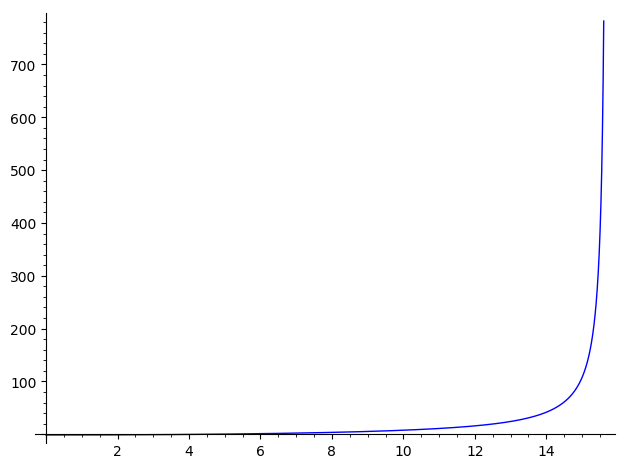

1/2*kappa_0*sin(0.100000000000000*kappa_0)/cos(0.100000000000000*kappa_0) + 1/119916983200*sqrt(898755178736817640000*kappa_0^2 + 7.89568352087149e23)*sin((3.33564095198152e-12)*sqrt(898755178736817640000*kappa_0^2 + 7.89568352087149e23))/cos((3.33564095198152e-12)*sqrt(898755178736817640000*kappa_0^2 + 7.89568352087149e23))
15.8079632679490 31.6159265358979


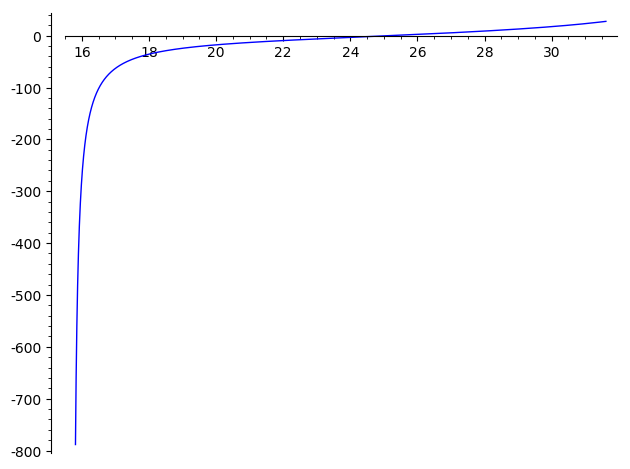

i = 1
1/4*kappa_1*sin(0.100000000000000*kappa_1)/cos(0.100000000000000*kappa_1) + 1/59958491600*sqrt(898755178736817640000*kappa_1^2 - 7.89568352087149e23)*sin((3.33564095198152e-12)*sqrt(898755178736817640000*kappa_1^2 - 7.89568352087149e23))/cos((3.33564095198152e-12)*sqrt(898755178736817640000*kappa_1^2 - 7.89568352087149e23))
0.000000000000000 15.6079632679490


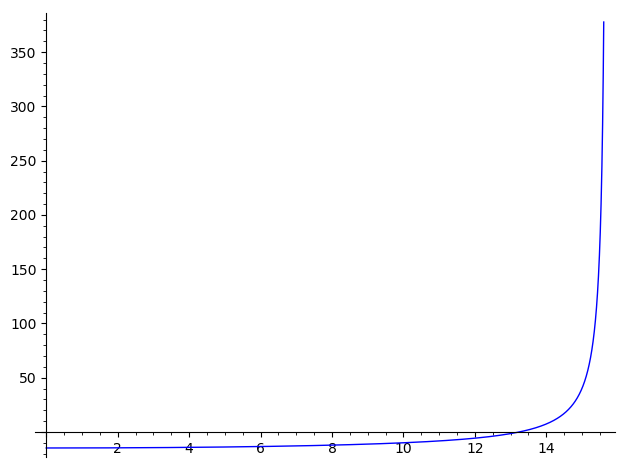

1/4*kappa_1*sin(0.100000000000000*kappa_1)/cos(0.100000000000000*kappa_1) + 1/59958491600*sqrt(898755178736817640000*kappa_1^2 - 7.89568352087149e23)*sin((3.33564095198152e-12)*sqrt(898755178736817640000*kappa_1^2 - 7.89568352087149e23))/cos((3.33564095198152e-12)*sqrt(898755178736817640000*kappa_1^2 - 7.89568352087149e23))
15.8079632679490 33.4447966342794


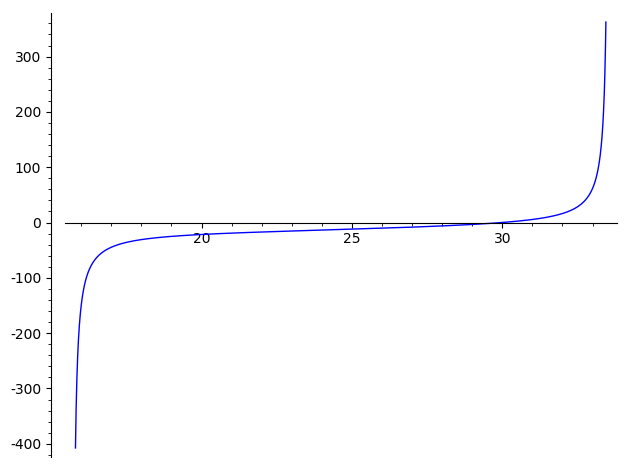

1/4*kappa_1*sin(0.100000000000000*kappa_1)/cos(0.100000000000000*kappa_1) + 1/59958491600*sqrt(898755178736817640000*kappa_1^2 - 7.89568352087149e23)*sin((3.33564095198152e-12)*sqrt(898755178736817640000*kappa_1^2 - 7.89568352087149e23))/cos((3.33564095198152e-12)*sqrt(898755178736817640000*kappa_1^2 - 7.89568352087149e23))
33.6447966342794 67.2895932685588


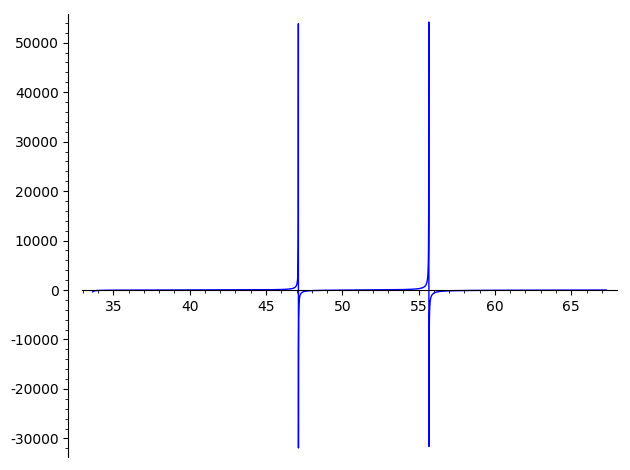

In [46]:
eps = 0.1
for i in range(n_layers):
    print ("i =", i)
    ai = 0.0
    for kappa_den_zero_d in kappa_den_zeros_d[i]:
        bi = kappa_den_zero_d - eps
        print(eqs_kappa_d[i].lhs())
        print(ai, bi)
        plot(eqs_kappa_d[i].lhs(), ai, bi).show()
        ai = kappa_den_zero_d + eps
    bi = ai * 2
    print(eqs_kappa_d[i].lhs())
    print(ai, bi)
    plot(eqs_kappa_d[i].lhs(), ai, bi).show()

ai = 0.100000000000000 bi = 15.6079632679490
eq_kappa_f(ai) = -1.32954997601207 eq_kappa_f(bi) = 782.141502830934


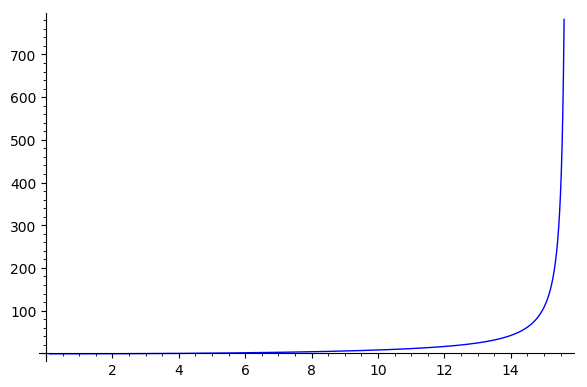

kappa_0 = 4.495641989954285
ai = 15.8079632679490 bi = 18.9695559215388
eq_kappa_f(ai) = -788.515191468747 eq_kappa_f(bi) = -24.5538831956633


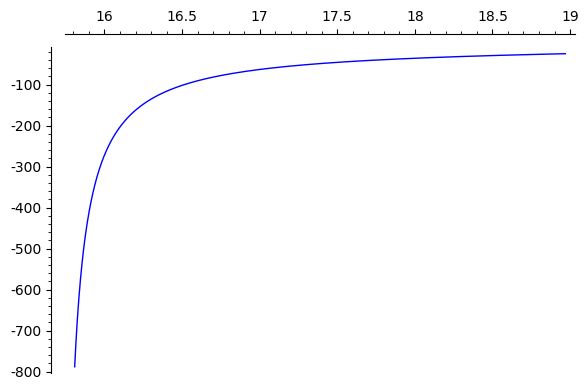

f(a) and f(b) must have different signs

ai = 0.100000000000000 bi = 15.6079632679490
eq_kappa_f(ai) = -14.7407767256690 eq_kappa_f(bi) = 377.749575097968


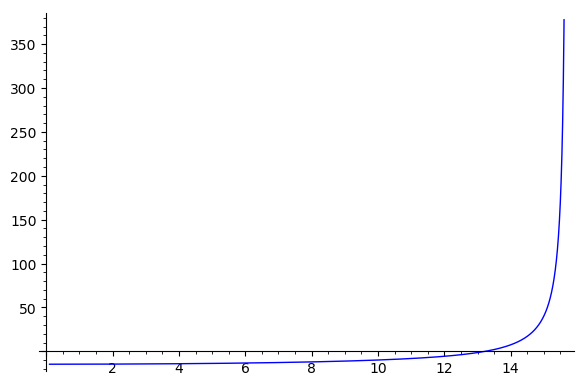

kappa_1 = 13.238442066068558
ai = 15.8079632679490 bi = 33.4447966342794
eq_kappa_f(ai) = -407.556660328669 eq_kappa_f(bi) = 362.473430244932


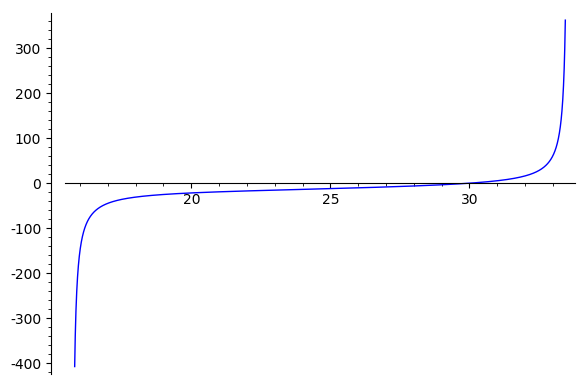

kappa_1 = 29.978726926101608
ai = 33.6447966342794 bi = 40.3737559611353
eq_kappa_f(ai) = -372.750070618136 eq_kappa_f(bi) = 6.81140220826753


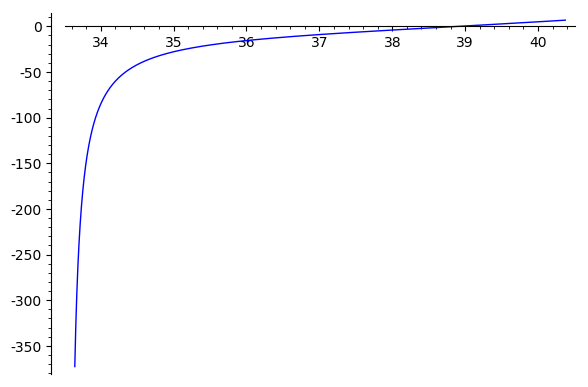

kappa_1 = 38.9011826240613



In [47]:
kappa_d = []
for i in range(n_layers):
    kappa_d += [[]]

eps = 0.1
from scipy.optimize import fsolve, root, brentq
for i in range(n_layers):
    ai = 0.0 + eps
    for kappa_den_zero_d in kappa_den_zeros_d[i]:
        bi = kappa_den_zero_d - eps
        exec(preparse( "eq_kappa_f = lambda x :" + str(eqs_kappa_d[i].lhs().subs(kappa[i] == x))))
        print ("ai =", ai, "bi =", bi)
        print ("eq_kappa_f(ai) =", eq_kappa_f(ai), "eq_kappa_f(bi) =", eq_kappa_f(bi))
        plot(eq_kappa_f, ai, bi).show()
        try:
            kappa_root = brentq(eq_kappa_f, ai, bi)
            kappa_d[i] += [kappa_root]
            print (kappa[i], "=", kappa_root)
        except Exception as ex:
            print (ex)
        ai = kappa_den_zero_d + eps
    bi = ai * 1.2

    exec(preparse( "eq_kappa_f = lambda x :" + str(eqs_kappa_d[i].lhs().subs(kappa[i] == x))))
    print ("ai =", ai, "bi =", bi)
    print ("eq_kappa_f(ai) =", eq_kappa_f(ai), "eq_kappa_f(bi) =", eq_kappa_f(bi))
    plot(eq_kappa_f, ai, bi).show()
    try:
        kappa_root = brentq(eq_kappa_f, ai, bi)
        kappa_d[i] += [kappa_root]
        print (kappa[i], "=", kappa_root)
    except Exception as ex:
        print (ex)

    print("") 

In [48]:
print (kappa_d)

[[4.495641989954285], [13.238442066068558, 29.978726926101608, 38.9011826240613]]


In [49]:
digit_kappas_k = []
for i in range(n_layers):
    for kk in range(len(kappa_d[i])):
        digit_kappa_i = [kappa[i] == kappa_d[i][kk]]
        print("digit_kappa_i [", i, "] =", digit_kappa_i)
        
        # for j in range(0, i):
        for j in range(i-1, -1, -1):
            print ("j", j)
            print(solve(eq_kappa2_kappa2[j], kappa[j]))
            digit_kappa_i_j = solve(eq_kappa2_kappa2[j], kappa[j])[0].subs(digit_kappa_i).subs(digit_values)
            print("digit_kappa_i_j [", i, ",", j, "] =", digit_kappa_i_j)
            print("digit_kappa_i_j [", i, ",", j, "].is_real() =", digit_kappa_i_j.rhs().is_real())
            if digit_kappa_i_j.rhs().is_real():
                digit_kappa_i += [digit_kappa_i_j]
            print("digit_kappa_i [", i, "] =", digit_kappa_i)

        # for j in range(n_layers-1, i,-1):
        for j in range(i+1, n_layers):
            print ("j", j)
            print(solve(eq_kappa2_kappa2[j-1], kappa[j]))
            digit_kappa_i_j = solve(eq_kappa2_kappa2[j-1], kappa[j])[0].subs(digit_kappa_i).subs(digit_values)
            print("digit_kappa_i_j [", i, ",", j, "] =", digit_kappa_i_j)
            print("digit_kappa_i_j [", i, ",", j, "].is_real() =", digit_kappa_i_j.rhs().is_real())
            if digit_kappa_i_j.rhs().is_real():
                digit_kappa_i += [digit_kappa_i_j]
            print("digit_kappa_i [", i, "] =", digit_kappa_i)
        
        print("")
        if len(digit_kappa_i) == n_layers:
            digit_kappas_k += [digit_kappa_i]

digit_kappa_i [ 0 ] = [kappa_0 == 4.495641989954285]
j 1
[
kappa_1 == sqrt(c^2*kappa_0^2 - epsilon_0*mu_0*omega^2 + epsilon_1*mu_1*omega^2)/c
]
digit_kappa_i_j [ 0 , 1 ] = kappa_1 == 29.9787269261016
digit_kappa_i_j [ 0 , 1 ].is_real() = True
digit_kappa_i [ 0 ] = [kappa_0 == 4.495641989954285, kappa_1 == 29.9787269261016]

digit_kappa_i [ 1 ] = [kappa_1 == 13.238442066068558]
j 0
[
kappa_0 == sqrt(c^2*kappa_1^2 + epsilon_0*mu_0*omega^2 - epsilon_1*mu_1*omega^2)/c
]
digit_kappa_i_j [ 1 , 0 ] = kappa_0 == (1.62381991751000e-15 + 26.5189917393417*I)
digit_kappa_i_j [ 1 , 0 ].is_real() = False
digit_kappa_i [ 1 ] = [kappa_1 == 13.238442066068558]

digit_kappa_i [ 1 ] = [kappa_1 == 29.978726926101608]
j 0
[
kappa_0 == sqrt(c^2*kappa_1^2 + epsilon_0*mu_0*omega^2 - epsilon_1*mu_1*omega^2)/c
]
digit_kappa_i_j [ 1 , 0 ] = kappa_0 == 4.49564198995433
digit_kappa_i_j [ 1 , 0 ].is_real() = True
digit_kappa_i [ 1 ] = [kappa_1 == 29.978726926101608, kappa_0 == 4.49564198995433]

digit_kappa_i [ 1 ]

In [50]:
print(digit_kappas_k)

[[kappa_0 == 4.495641989954285, kappa_1 == 29.9787269261016], [kappa_1 == 29.978726926101608, kappa_0 == 4.49564198995433], [kappa_1 == 38.9011826240613, kappa_0 == 25.1950141564286]]


In [49]:
digit_kappas = []
for i in range(n_layers - 1):
    display(Math(latex(eq_kappa2_kappa2[i])))
    for j in range(min((len(kappa_d[i]), len(kappa_d[i+1])))):
        print ([kappa[i] == kappa_d[i][j], kappa[i+1] == kappa_d[i+1][j+1]])
        print (eq_kappa2_kappa2[i].subs([kappa[i] == kappa_d[i][j], kappa[i+1] == kappa_d[i+1][j+1]]))
        print (eq_kappa2_kappa2[i].subs([kappa[i] == kappa_d[i][j], kappa[i+1] == kappa_d[i+1][j+1]]).subs(digit_values))
        print ("")

    for j in (0,):
        digit_kappas += [kappa[i] == kappa_d[i][j], kappa[i+1] == kappa_d[i+1][j+1]]
        
print ("digit_kappas =", digit_kappas)

<IPython.core.display.Math object>

[kappa_0 == 4.495641989954285, kappa_1 == 29.978726926101608]
omega^2/c^2 == -878.5132712079294/(epsilon_0*mu_0 - epsilon_1*mu_1)
439.256635603965 == 439.2566356039647

digit_kappas = [kappa_0 == 4.495641989954285, kappa_1 == 29.978726926101608]


In [51]:
for j in range(len(digit_kappas_k)):
    for i in range(n_layers - 1):
        eq = eq_kappa[i].subs(digit_kappas_k[j]).subs(digit_values)
        print (eq, type(eq))
        digit_k_j = solve(eq, k)
        print (digit_k_j)
        for digit_k in digit_k_j:
            if digit_k.rhs() > 0:
                print (digit_k.rhs().n())
                if 0 == i:
                    digit_kappas_k[j] += [k == digit_k.rhs().n()]

-k^2 + 878.513271207929 == 20.210796901840123 <class 'sage.symbolic.expression.Expression'>
[
k == -1/1050638*sqrt(901765195)*sqrt(1050638),
k == 1/1050638*sqrt(901765195)*sqrt(1050638)
]
29.2967997280605
-k^2 + 878.513271207929 == 20.2107969018405 <class 'sage.symbolic.expression.Expression'>
[
k == -1/1050638*sqrt(901765195)*sqrt(1050638),
k == 1/1050638*sqrt(901765195)*sqrt(1050638)
]
29.2967997280605
-k^2 + 878.513271207929 == 634.788738342640 <class 'sage.symbolic.expression.Expression'>
[
k == -1/595385*sqrt(145109931)*sqrt(595385),
k == 1/595385*sqrt(145109931)*sqrt(595385)
]
15.6116793736385


In [52]:
print(digit_kappas_k)

[[kappa_0 == 4.495641989954285, kappa_1 == 29.9787269261016, k == 29.2967997280605], [kappa_1 == 29.978726926101608, kappa_0 == 4.49564198995433, k == 29.2967997280605], [kappa_1 == 38.9011826240613, kappa_0 == 25.1950141564286, k == 15.6116793736385]]


In [52]:
digit_k = []
for i in range(n_layers - 1):
    display(Math(latex(eq_kappa[i])))
    display(Math(latex(eq_kappa[i+1])))
    print ("")
    for j in range(min((len(kappa_d[i]), len(kappa_d[i+1])))):
        display(Math(latex(kappa[i  ] == kappa_d[i  ][j  ])))
        display(Math(latex(kappa[i+1] == kappa_d[i+1][j+1])))
        print ("")

        display(Math(latex(eq_kappa[i  ].subs(kappa[i  ] == kappa_d[i  ][j  ]))))
        display(Math(latex(eq_kappa[i+1].subs(kappa[i+1] == kappa_d[i+1][j+1]))))
        print ("")
        
        display(Math(latex(eq_kappa[i  ].subs(kappa[i  ] == kappa_d[i  ][j  ]).subs(digit_values))))
        display(Math(latex(eq_kappa[i+1].subs(kappa[i+1] == kappa_d[i+1][j+1]).subs(digit_values))))
        print ("")
        
        display(Math(latex(solve(eq_kappa[i  ].subs(kappa[i]   == kappa_d[i][j]    ).subs(digit_values), k))))
        display(Math(latex(solve(eq_kappa[i+1].subs(kappa[i+1] == kappa_d[i+1][j+1]).subs(digit_values), k))))
        
    for j in (0,):
        digit_k += solve(eq_kappa[i  ].subs(kappa[i  ] == kappa_d[i  ][j  ]).subs(digit_values), k)
        digit_k += solve(eq_kappa[i+1].subs(kappa[i+1] == kappa_d[i+1][j+1]).subs(digit_values), k)

digit_k = [k == v.rhs().n() for v in digit_k if v.rhs() > 0]
digit_k = [digit_k[0]]
print ("digit_k =", digit_k)

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

digit_k = [k == 29.2967997280605]


In [53]:
# граничные условия на гринице диэлектрика и диэлектрика
# тангенциальная компонента поля H
# eq_Hy_boundary_conditions = []
Bz_eqs = []
for i in range(n_layers - 1):
    # eq_Hy_boundary_conditions += [Hy[i] (a*(i+1)) == Hy[i+1](a*(i+1))]
    eq_Hy_bound_cond = eq_Hy_boundary_conditions[i].subs(eqsys_rotH_subs).subs(boundary_subs).full_simplify().expand()
    Bz_eqs += solve(eq_Hy_bound_cond, Bz[i+1])
    display(Math(latex(Bz_eqs[i])))

<IPython.core.display.Math object>

In [54]:
Ex_res = []
Ez_res = []
for i in range(n_layers):
    Ex_res += [ lambda x, i=i : Ex[i](x).subs(eqsys_rotH_subs).subs(boundary_subs).full_simplify().expand()]
    Ez_res += [ lambda x, i=i : Ez[i](x).subs(eqsys_rotH_subs).subs(boundary_subs).full_simplify().expand()]

for i in range(n_layers):
    print ("Ex[", i, "]=")
    display(Math(latex(Ex_res[i](x))))
    print ("Ez[", i, "]=")
    display(Math(latex(Ez_res[i](x))))
    print("")
    
for i in range(n_layers):
    if i > 0:
        print ("Ex[", i, "]=")
        display(Math(latex(Ex_res[i](x).subs(Bz_eqs[i-1]).full_simplify().expand())))
        print ("Ez[", i, "]=")
        display(Math(latex(Ez_res[i](x).subs(Bz_eqs[i-1]).full_simplify().expand())))
    print("")

Ex[ 0 ]=


<IPython.core.display.Math object>

Ez[ 0 ]=


<IPython.core.display.Math object>


Ex[ 1 ]=


<IPython.core.display.Math object>

Ez[ 1 ]=


<IPython.core.display.Math object>



Ex[ 1 ]=


<IPython.core.display.Math object>

Ez[ 1 ]=


<IPython.core.display.Math object>

In [55]:
Hy_res = []
for i in range(n_layers):
    Hy_res  += [lambda x, i=i : Hy[i](x).subs(eqsys_rotH_subs).subs(boundary_subs).full_simplify()]
    print ("Hy[", i, "]=")
    display(Math(latex(Hy_res[i](x))))
    if i > 0:
        print ("Hy[", i, "]=")
        display(Math(latex(Hy_res[i](x).subs(Bz_eqs[i-1]).full_simplify().expand())))

    print("")

Hy[ 0 ]=


<IPython.core.display.Math object>


Hy[ 1 ]=


<IPython.core.display.Math object>

Hy[ 1 ]=


<IPython.core.display.Math object>

In [64]:
Ex_d = []
Ez_d = []
Hy_d = []
for j in range(len(digit_kappas_k)):
    Ex_d += [[]]
    Ez_d += [[]]
    Hy_d += [[]]
    for i in range(n_layers):
        if i > 0:
            Ex_d[j] += [ lambda x, i=i : Ex_res[i](x).subs(Bz_eqs[i-1]).subs(digit_values).subs(a==A,Bz_0==1).subs(digit_kappas_k[j])]
            Ez_d[j] += [ lambda x, i=i : Ez_res[i](x).subs(Bz_eqs[i-1]).subs(digit_values).subs(a==A,Bz_0==1).subs(digit_kappas_k[j])]
            Hy_d[j] += [ lambda x, i=i : Hy_res[i](x).subs(Bz_eqs[i-1]).subs(digit_values).subs(a==A,Bz_0==1).subs(digit_kappas_k[j])]
        else:
            Ex_d[j] += [ lambda x, i=i : Ex_res[i](x).subs(digit_values).subs(a==A,Bz_0==1).subs(digit_kappas_k[j])]
            Ez_d[j] += [ lambda x, i=i : Ez_res[i](x).subs(digit_values).subs(a==A,Bz_0==1).subs(digit_kappas_k[j])]
            Hy_d[j] += [ lambda x, i=i : Hy_res[i](x).subs(digit_values).subs(a==A,Bz_0==1).subs(digit_kappas_k[j])]
        
    for i in range(n_layers):
        print ("Ex[", j, "][", i, "]=")
        display(Math(latex(Ex_d[j][i](x))))
        print ("Ez[", j, "][", i, "]=")
        display(Math(latex(Ez_d[j][i](x))))
        print ("Hy[", j, "][", i, "]=")
        display(Math(latex(Hy_d[j][i](x))))
        print("")

Ex[ 0 ][ 0 ]=


<IPython.core.display.Math object>

Ez[ 0 ][ 0 ]=


<IPython.core.display.Math object>

Hy[ 0 ][ 0 ]=


<IPython.core.display.Math object>


Ex[ 0 ][ 1 ]=


<IPython.core.display.Math object>

Ez[ 0 ][ 1 ]=


<IPython.core.display.Math object>

Hy[ 0 ][ 1 ]=


<IPython.core.display.Math object>


Ex[ 1 ][ 0 ]=


<IPython.core.display.Math object>

Ez[ 1 ][ 0 ]=


<IPython.core.display.Math object>

Hy[ 1 ][ 0 ]=


<IPython.core.display.Math object>


Ex[ 1 ][ 1 ]=


<IPython.core.display.Math object>

Ez[ 1 ][ 1 ]=


<IPython.core.display.Math object>

Hy[ 1 ][ 1 ]=


<IPython.core.display.Math object>


Ex[ 2 ][ 0 ]=


<IPython.core.display.Math object>

Ez[ 2 ][ 0 ]=


<IPython.core.display.Math object>

Hy[ 2 ][ 0 ]=


<IPython.core.display.Math object>


Ex[ 2 ][ 1 ]=


<IPython.core.display.Math object>

Ez[ 2 ][ 1 ]=


<IPython.core.display.Math object>

Hy[ 2 ][ 1 ]=


<IPython.core.display.Math object>

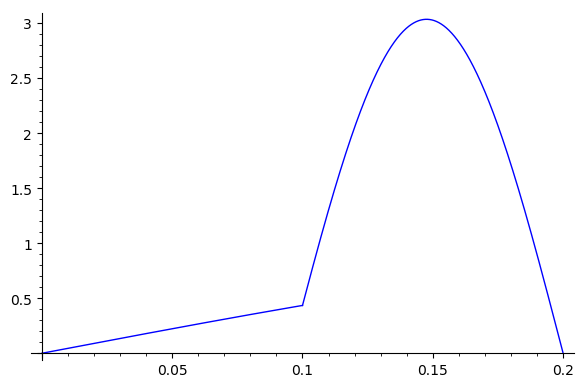

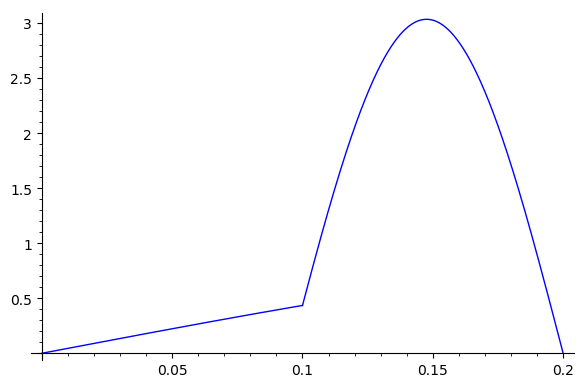

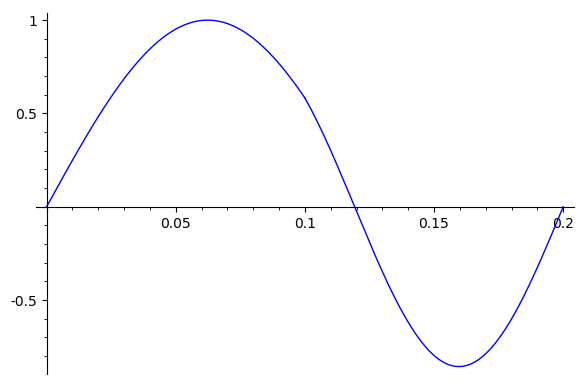

In [65]:
for j in range(len(digit_kappas_k)):
    p = sage.plot.graphics.Graphics()
    for i in range(n_layers):
        p += plot(Ez_d[j][i] (x), (x, i*A, (i+1)*A))

    p.show()

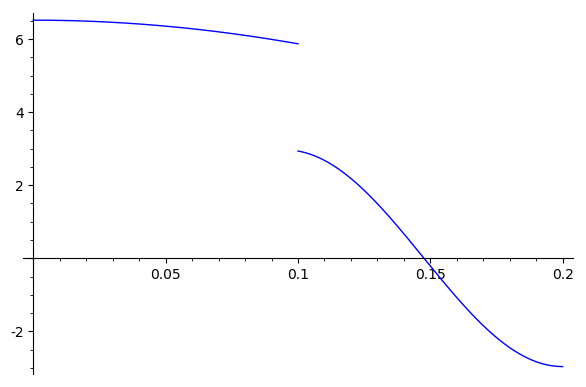

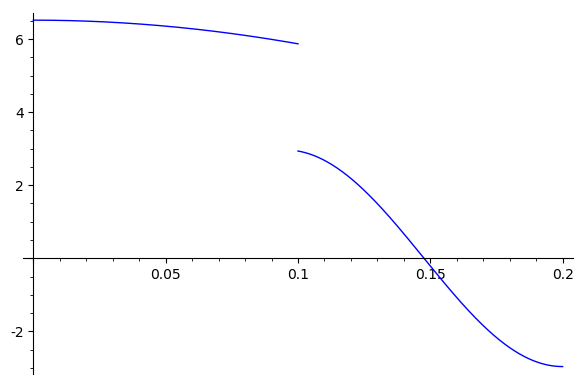

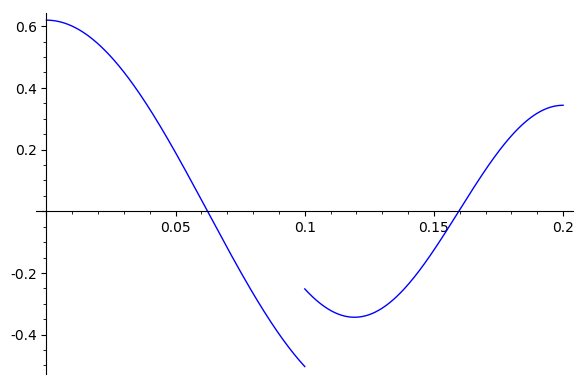

In [67]:
for j in range(len(digit_kappas_k)):
    p = sage.plot.graphics.Graphics()
    for i in range(n_layers):
        p += plot(Ex_d[j][i] (x).imag(), (x, i*A, (i+1)*A))

    p.show()

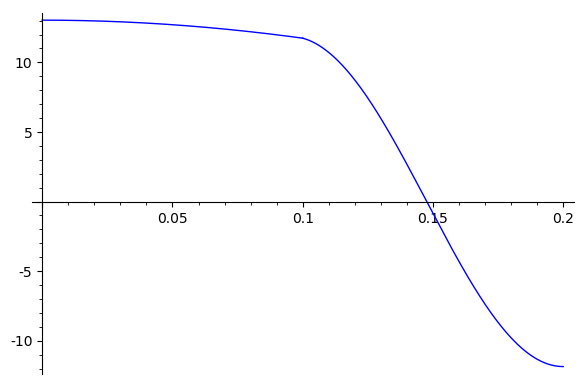

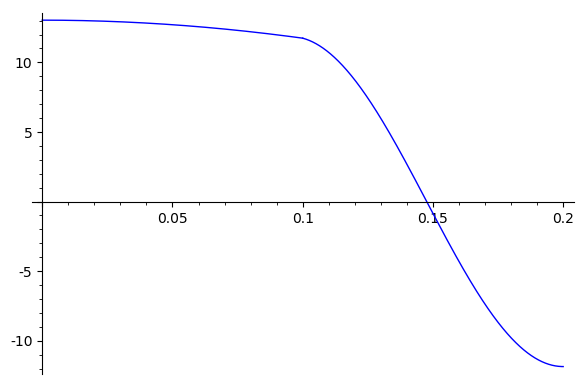

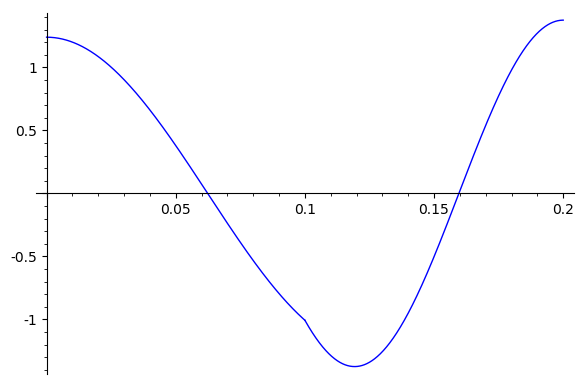

In [68]:
for j in range(len(digit_kappas_k)):
    p = sage.plot.graphics.Graphics()
    for i in range(n_layers):
        p += plot(epsilon[i].subs(digit_values) * (Ex_d[j][i] (x).imag()), (x, i*A, (i+1)*A))

    p.show()

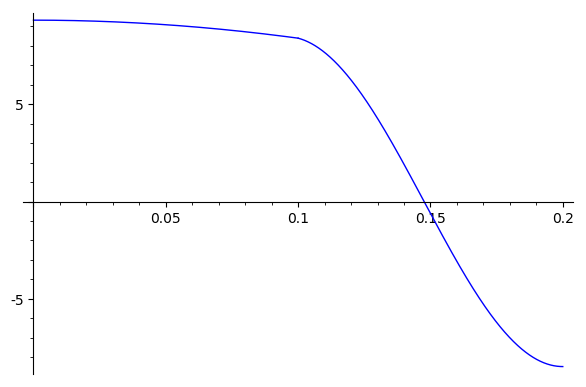

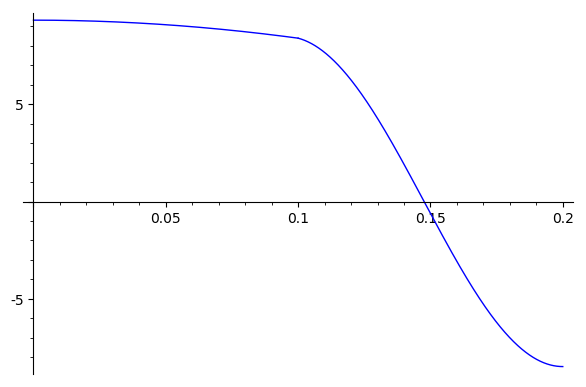

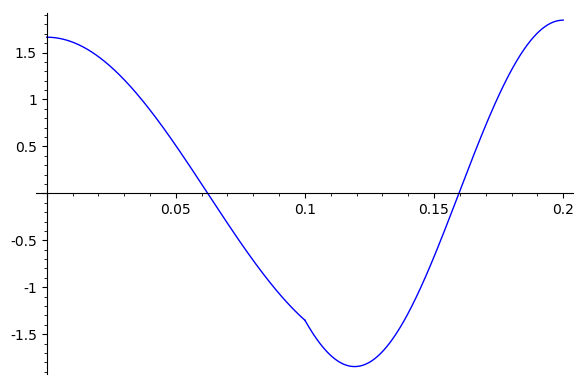

In [69]:
for j in range(len(digit_kappas_k)):
    p = sage.plot.graphics.Graphics()
    for i in range(n_layers):
        p += plot(Hy_d[j][i] (x).imag(), (x, i*A, (i+1)*A))

    p.show()

Решение получено.

Теперь посчитаем:

1) силу Абрагама, приложенную к диэлектрику

2) пондемоторную силу, приложенную к идеальному проводнику

In [71]:
# Abraham force
# (epsilon * mu - 1) / (4 * pi * c) * ([E x H]).diff(t)
# (epsilon * mu - 1) / (4 * pi * c) * ([E.diff(t) x H] + [E x H.diff(t)])
# ([a x b])_x = a_y * b_z - a_z * b_y
# f_x = (epsilon * mu - 1) / (4 * pi * c) * (-E_z.diff(t) * H_y - E_z * H_y.diff(t))
# E_z.diff(t) = -I * omega * E_z
# H_y.diff(t) = -I * omega * H_y
# f_x = (epsilon * mu - 1) / (4 * pi * c) * (E_z * H_y + E_z * H_y) * I * omega
# f_x = (epsilon * mu - 1) / (2 * pi * c) * (E_z * H_y) * I * omega

Abraham_f_x = []
for i in range(n_layers):
    Abraham_f_x   += [ lambda x, i=i : ((epsilon[i] * mu[i] - 1) / (2 * pi * c) * (Ez_res[i] (x) * Hy_res[i] (x)) * I * omega).full_simplify()]
    
    print("Abraham_f_x =")
    display(Math(latex(Abraham_f_x[i](x))))
    
Abraham_f_x_d = []
for j in range(len(digit_kappas_k)):
    Abraham_f_x_d += [[]]
    for i in range(n_layers):
        Abraham_f_x_d[j] += [ lambda x, i=i : ((epsilon[i] * mu[i] - 1) / (2 * pi * c) * (Ez_d[j][i] (x) * Hy_d[j][i] (x)) * I * omega).subs(digit_values) ]
    
        print("Abraham_f_x_d[", j, "][", i, "] =")
        display(Math(latex(Abraham_f_x_d[j][i](x))))

Abraham_f_x =


<IPython.core.display.Math object>

Abraham_f_x =


<IPython.core.display.Math object>

Abraham_f_x_d[ 0 ][ 0 ] =


<IPython.core.display.Math object>

Abraham_f_x_d[ 0 ][ 1 ] =


<IPython.core.display.Math object>

Abraham_f_x_d[ 1 ][ 0 ] =


<IPython.core.display.Math object>

Abraham_f_x_d[ 1 ][ 1 ] =


<IPython.core.display.Math object>

Abraham_f_x_d[ 2 ][ 0 ] =


<IPython.core.display.Math object>

Abraham_f_x_d[ 2 ][ 1 ] =


<IPython.core.display.Math object>

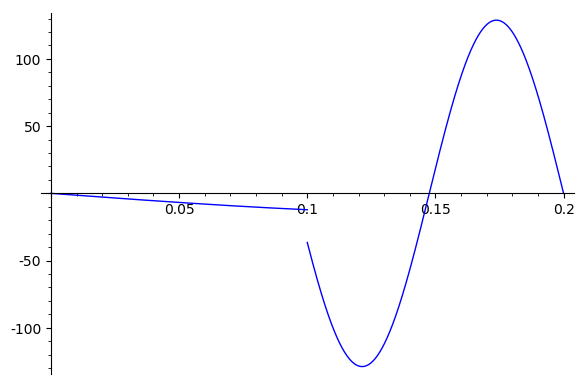

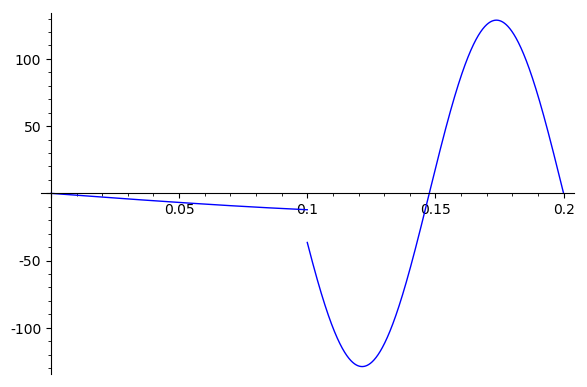

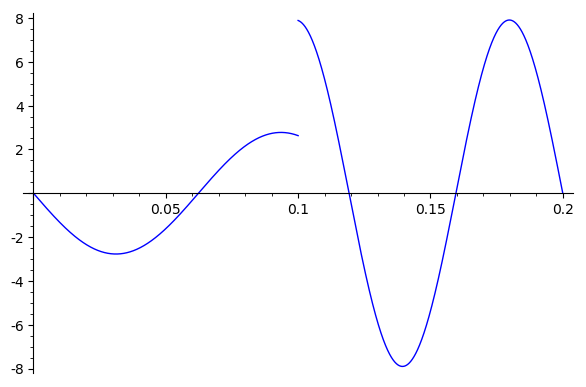

In [72]:
for j in range(len(digit_kappas_k)):
    p = sage.plot.graphics.Graphics()
    for i in range(n_layers):
        p += plot(Abraham_f_x_d[j][i] (x), (x, i*A, (i+1)*A))

    p.show()

In [73]:
Abraham_F_x = []
for j in range(len(digit_kappas_k)):
    Abraham_F_x += [0]
    for i in range(n_layers):
        Abraham_F_x_i = integrate(Abraham_f_x_d[j][i] (x), (x, i*A, (i+1)*A))
        print("Abraham_F_x[", j, "][", i, "]=", Abraham_F_x_i)
        Abraham_F_x[j] += Abraham_F_x_i
    print("Abraham_F_x =", Abraham_F_x[j])

Abraham_F_x[ 0 ][ 0 ]= -2.0522512630061756/pi
Abraham_F_x[ 0 ][ 1 ]= 0.2769101325308955/pi
Abraham_F_x = -1.77534113047528/pi
Abraham_F_x[ 1 ][ 0 ]= -2.0522512630061733/pi
Abraham_F_x[ 1 ][ 1 ]= 0.2769101325308641/pi
Abraham_F_x = -1.7753411304753093/pi
Abraham_F_x[ 2 ][ 0 ]= -0.11749047869811903/pi
Abraham_F_x[ 2 ][ 1 ]= 0.295704224018895/pi
Abraham_F_x = 0.178213745320776/pi


In [75]:
for j in range(len(digit_kappas_k)):
    print(Hy_d[j][0] (0))

9.323896460772191*I
9.32389646077210*I
1.66369822929186*I


In [76]:
for j in range(len(digit_kappas_k)):
    print(Hy_d[j][n_layers-1] (n_layers * A))

-8.48492128115020*I
-8.48492128115011*I
1.84527969785924*I


In [80]:
# superconductor force
f_superconductor = []
for j in range(len(digit_kappas_k)):
    f_superconductor_j_down = - abs(((Hy_d[j][0] (0))^2) / (8* pi))
    f_superconductor_j_up   = + abs(((Hy_d[j][n_layers-1] (n_layers * A))^2) / (8* pi))
    f_superconductor_j = f_superconductor_j_down + f_superconductor_j_up
    print("f_superconductor_[", j, "]_down =", f_superconductor_j_down)
    print("f_superconductor_[", j, "]_up =", f_superconductor_j_up)
    print("f_superconductor[", j, "] =", f_superconductor_j)
    
    f_superconductor += [f_superconductor_j]

f_superconductor_[ 0 ]_down = -10.866880651400027/pi
f_superconductor_[ 0 ]_up = 8.99923614341445/pi
f_superconductor[ 0 ] = -1.86764450798558/pi
f_superconductor_[ 1 ]_down = -10.8668806513998/pi
f_superconductor_[ 1 ]_up = 8.99923614341424/pi
f_superconductor[ 1 ] = -1.86764450798557/pi
f_superconductor_[ 2 ]_down = -0.345986474768608/pi
f_superconductor_[ 2 ]_up = 0.425632145416435/pi
f_superconductor[ 2 ] = 0.0796456706478268/pi


In [ ]:
for j in range(len(digit_kappas_k)):
    f_sum = Abraham_F_x + f_superconductor
    print("f_sum =", f_sum)